**Keras-MNIST-CNN-Learning-Curve**  

This is a modified version using MNIST data directly from the Keras repository.  
The train test split is 60k/10k which is different from the Kaggle data (42k/28k)  
The example contains a learning curve and confusion matrix.  
Model ensembles will improve the accuracy.    

Training on GPU over 60 epochs  
Test loss: 0.030968  
Test accuracy: 0.9944  

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv']


In [4]:
"""
@author: Keras doc
https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
and fchollet
https://www.kaggle.com/fchollet/simple-deep-mlp-with-keras/code
"""

'''Trains a simple convnet on the MNIST dataset.
Original scripts gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU. (12x16s=3.2 minutes)
Geforce 1050: 11 seconds per epoch with batch size 128
Geforce 1050:  8 seconds per epoch with batch size 256
Geforce 1050:  6 seconds per epoch with batch size 512
Test loss: 0.023903
Test accuracy: 0.9923
'''

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt


In [5]:
batch_size = 128 #128
num_classes = 10
epochs = 60

# input image dimensions
img_rows, img_cols = 28, 28

# Read data
train = pd.read_csv('input/train.csv')
# Use .iloc for integer-based indexing to select the first column (index 0) for labels
train_labels = train.iloc[:, 0].values.astype('int32')
x_train = (train.iloc[:, 1:].values).astype('float32')

test =  pd.read_csv('input/test.csv')
# Use .iloc for integer-based indexing to select the first column (index 0) for labels
test_labels = test.iloc[:, 0].values.astype('int32')
x_test = (test.iloc[:, 1:].values).astype('float32')

In [6]:
# 0. prepare dataset


# https://www.codesofinterest.com/2017/09/keras-image-data-format.html
# Keras image_data_format():  channels_last
from keras import backend as K
print("\n")
print("Keras image_data_format(): ",K.image_data_format())

# reshape to (42000, 28, 28, 1)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    # normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("\n")

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print("\n")

'''
Keras image_data_format():  channels_last
x_train shape: (42000, 28, 28, 1)
42000 train samples
28000 test samples
'''



Keras image_data_format():  channels_last
x_train shape: (16636, 28, 28, 1)


16636 train samples
14919 test samples




'\nKeras image_data_format():  channels_last\nx_train shape: (42000, 28, 28, 1)\n42000 train samples\n28000 test samples\n'

In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_labels)

y_test = keras.utils.to_categorical(test_labels)


In [8]:
#取第一筆的答案來看看 one-hot encoding
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# 1. define the model
# Built model with convolutional Layer and Dense layer and dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(8, 8),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (8, 8), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
earlystopping=[EarlyStopping(monitor='loss', patience=5, verbose=1, mode='auto')]


# 2. compile the model

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 3. train the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=60,
          verbose=1,
          validation_split=0.1, # 一定取最後10%
          callbacks=earlystopping)

# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.1, shuffle= True) # 隨機取10%

Epoch 1/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 89s 739ms/step - accuracy: 0.1153 - loss: 2.2973 - val_accuracy: 0.1370 - val_loss: nan
Epoch 2/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 138s 709ms/step - accuracy: 0.1420 - loss: 2.2814 - val_accuracy: 0.1617 - val_loss: nan
Epoch 3/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 141s 698ms/step - accuracy: 0.1650 - loss: 2.2634 - val_accuracy: 0.1995 - val_loss: nan
Epoch 4/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 83s 710ms/step - accuracy: 0.1947 - loss: 2.2453 - val_accuracy: 0.2428 - val_loss: nan
Epoch 5/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 81s 689ms/step - accuracy: 0.2121 - loss: 2.2283 - val_accuracy: 0.2981 - val_loss: nan
Epoch 6/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 81s 692ms/step - accuracy: 0.2480 - loss: 2.2074 - val_accuracy: 0.3528 - val_loss: nan
Epoch 7/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 84s 711ms/step - accuracy: 0.2710 - loss: 2.1894 - val_accuracy: 0.3996 - val_loss: nan
Epoch 8/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 139s 690ms/step - accuracy: 0.3020 - loss: 2.1668 - val_accura

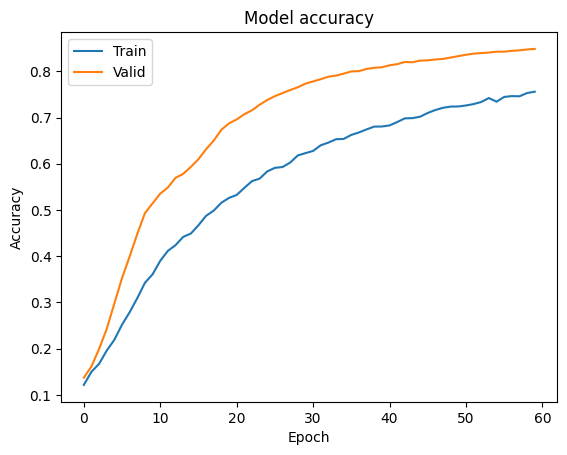

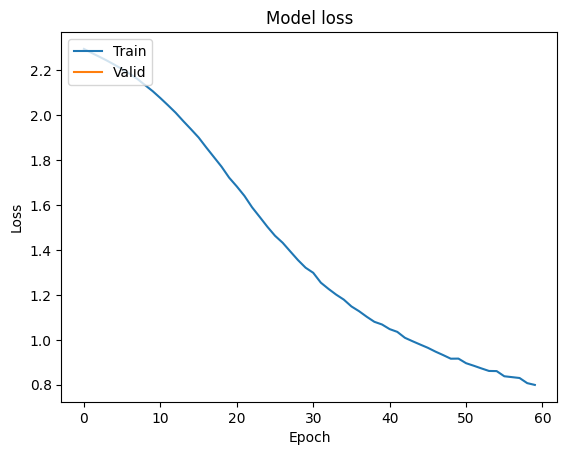

In [11]:
# prompt: plot the learing curve

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [53]:
# 4. evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: nan
Test accuracy: 0.8454990386962891


In [15]:
# 5. predict the values by model
print("Generating test predictions...")
y_pred = model.predict(x_test, verbose=0)

def write_preds(preds, fname):
    # Get the predicted labels (highest probability)
    predicted_labels = preds.argmax(axis=1)
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": predicted_labels}).to_csv(fname, index=False, header=True)

write_preds(y_pred, "keras-cnn.csv")
print("Finished prediction.")

Generating test predictions...
Finished prediction.


In [17]:
y_test[0], y_pred[0], y_pred[0].argmax()

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1.7831115e-03, 2.0648544e-05, 9.9199355e-01, 1.8662226e-04,
        1.5154669e-04, 7.1319351e-05, 4.0696310e-03, 3.1893447e-04,
        1.1074367e-03, 2.9720223e-04], dtype=float32),
 np.int64(2))

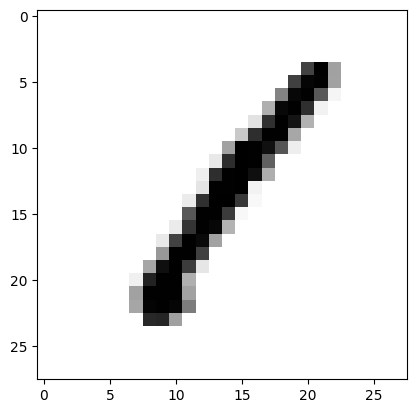

In [176]:
# 觀察資料
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [18]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1) ,y_pred.argmax(axis=1) )
print(cm)


[[1435    3   10    8    1   11   16    5   15    1]
 [   1 1659   10    4    1    7    1    4   41    2]
 [  13   14 1176    6   56    1   53   43   79    3]
 [  12   24   52 1220    4   54    1   43   68    3]
 [   4   20    5    0 1254    0   70    2    4  122]
 [  63   45    8   93   16  974   24   14   75   47]
 [  24   54   35    2   14   37 1309    0    7    0]
 [  20   36   51    4   10    2    1 1298   18   61]
 [  11   81   35   71    9   41   17    9 1120   50]
 [  17   42   35   21   97    4   13   84   10 1169]]


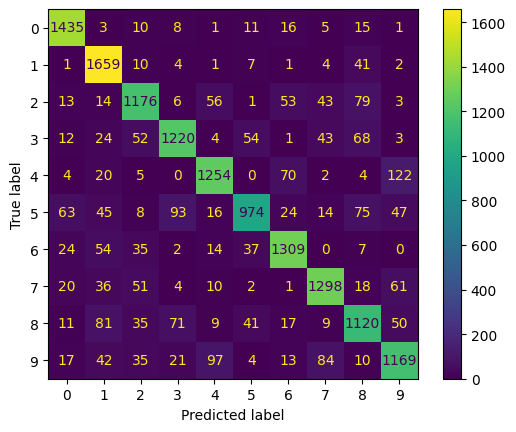

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['0','1','2','3','4','5','6','7','8','9'])
disp.plot()

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.argmax(axis=1) ,y_pred.argmax(axis=1) )

# 準確度

0.8454990280849923

In [21]:
from sklearn.metrics import precision_score

precision = precision_score(y_test.argmax(axis=1) ,y_pred.argmax(axis=1),  average=None)

# 各類別精確度
precision

array([0.896875  , 0.83872599, 0.82992237, 0.85374388, 0.85772914,
       0.86118479, 0.86976744, 0.86418109, 0.77940153, 0.80178326])

In [22]:
from sklearn.metrics import recall_score

recall = recall_score(y_test.argmax(axis=1) ,y_pred.argmax(axis=1),  average=None)

# 各類別recall
recall

array([0.95348837, 0.95895954, 0.81440443, 0.82376772, 0.84672519,
       0.71670346, 0.88326586, 0.86475683, 0.77562327, 0.78351206])

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test.argmax(axis=1) ,y_pred.argmax(axis=1),  average=None)

# 各類別 f1-score

array([0.92431562, 0.89482201, 0.82209018, 0.83848797, 0.85219164,
       0.78232932, 0.87646468, 0.86446886, 0.77750781, 0.79254237])

## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [24]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [26]:
loaded_model = keras.models.load_model(model_name)

## 手寫測試 ##########

In [267]:
%matplotlib inline

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>

<br/>
<button>存檔</button>
<input type="submit" value="清除" id="clearbutton" onclick="clearCanvas(canvas,ctx);">


<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
ctx.lineWidth = 6

// Clear the canvas context using the canvas width and height
function clearCanvas(canvas, ctx) {
  ctx.clearRect(0, 0, canvas.width, canvas.height);

}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.jpg', w=84, h=84, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
    print("存檔成功,大小:", sep="")
  return len(binary)

In [284]:
# 開啓繪圖面版
# 原訓練圖字佔滿方格.故要畫滿方格較易辨識.
draw()

存檔成功,大小:


801

(28, 28) 26009.0


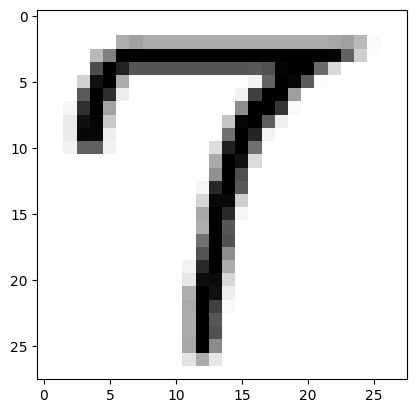

In [285]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

im = Image.open('drawing.jpg')
im = im.resize((28,28))

im_np = np.array(im).astype('float32')  # Convert to NumPy array
im_np = im_np[...,-1] #去掉 channel

print(im_np.shape, im_np.sum() )
plt.imshow(im_np, cmap=plt.cm.binary)


im2arr = im_np.reshape(1,28,28,1)
im2arr = im2arr.astype('float32')
im2arr /= 255  # 因訓練資料有Normalization

In [286]:
y_pred = model.predict(im2arr)
y_hat = y_pred.argmax(axis=1) # Use predict and argmax to get predicted class
print(y_hat, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[1] [[0.00171915 0.73773813 0.06325265 0.06843157 0.00323822 0.01207572
  0.00823466 0.00408613 0.08520512 0.01601858]]
